# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data

In [2]:
# Read data
housing = pd.read_csv("datasets/housing/housing.csv")

## Minor exploration

In [3]:
def general_info(data, col_to_value_count=None, col_to_unique_values=None):
	guion = "-" * 50
	# Display general information about the data
	print(f"Data info:")
	print(guion)
	print(data.info())
	print(f"\n\nData head:")
	print(guion)
	print(data.head())
	print(f"\n\nData describe:")
	print(guion)
	print(data.describe())
	if col_to_value_count is not None:
		print(f"\n\nData value count for {col_to_value_count}:")
		print(guion)
		print(data[col_to_value_count].value_counts())
	if col_to_unique_values is not None:
		print(f"\n\nData unique values for {col_to_unique_values}:")
		print(guion)
		print(data[col_to_unique_values].unique())

In [4]:
general_info(housing, col_to_value_count="ocean_proximity")

Data info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


Data head:
--------------------------------------------------
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0   

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

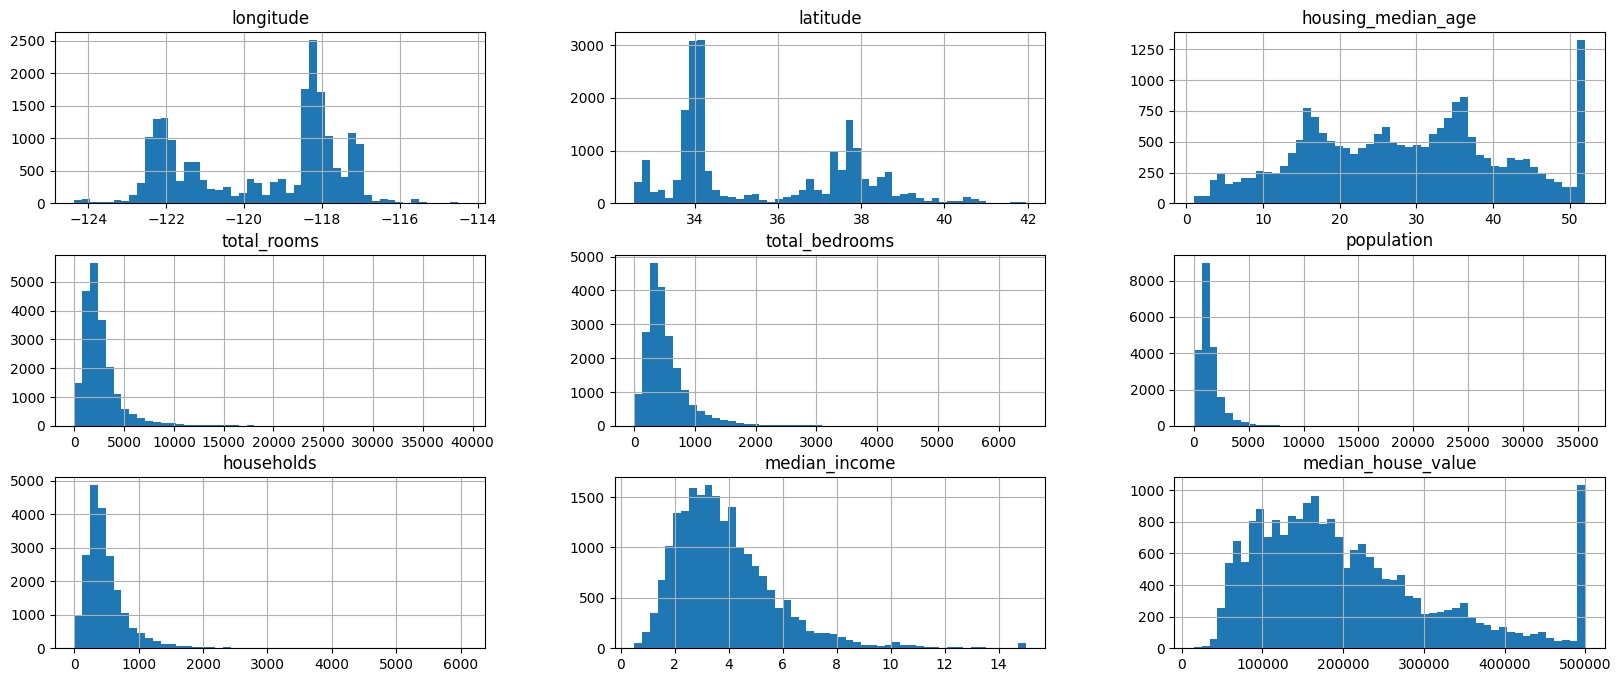

In [5]:
housing.hist(bins=50, figsize=(20,8))

In [6]:
# Create income category attribute (5 categories) to have a representative train and test set
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

## Divide data into train and test

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing['income_cat'])

In [8]:
# Check distribution of income categories in the train, test and whole set

df = pd.DataFrame({'Whole set': housing['income_cat'].value_counts() / len(housing), 'Train set': train_set['income_cat'].value_counts() / len(train_set), 'Test set': test_set['income_cat'].value_counts() / len(test_set)})
df['Train set % error'] = (df['Whole set'] - df['Train set']) / df['Whole set'] * 100
df['Test set % error'] = (df['Whole set'] - df['Test set']) / df['Whole set'] * 100
df.sort_index()

,Whole set,Train set,Test set,Train set % error,Test set % error
income_cat,,,,,
1,0.039826,0.039789,0.039971,0.091241,-0.364964
2,0.318847,0.318859,0.318798,-0.003799,0.015195
3,0.350581,0.350594,0.350533,-0.003455,0.013820
4,0.176308,0.176296,0.176357,0.006870,-0.027480
5,0.114438,0.114462,0.114341,-0.021169,0.084674


In [9]:
# Now we drop the income_cat attribute so the data is back to its original state
for set_ in (train_set, test_set):
	set_.drop("income_cat", axis=1, inplace=True)

In [10]:
# I only work with the training set
housing = train_set.copy()

## Visualizations

<Axes: xlabel='longitude', ylabel='latitude'>

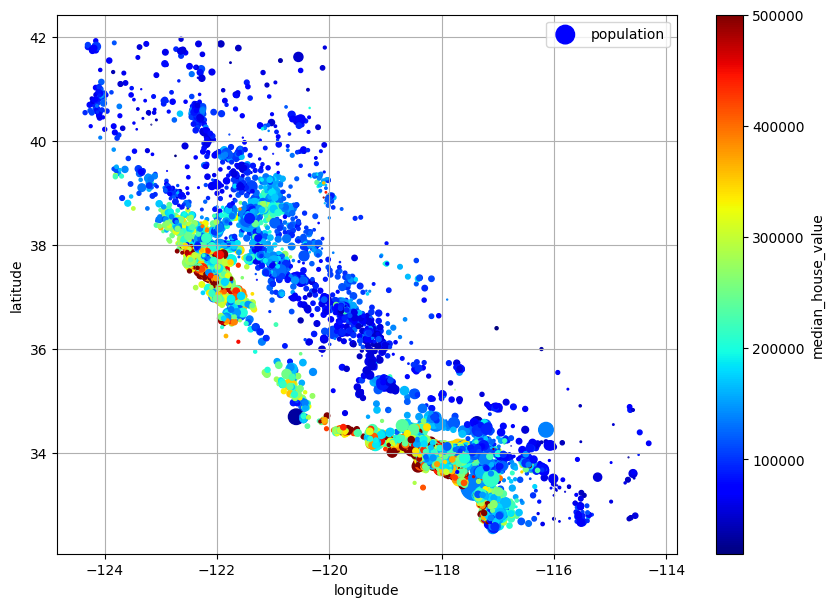

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
    s=housing["population"] / 100, label="population", c="median_house_value",
	cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10, 7))

In [12]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [13]:
correlated = corr_matrix["median_house_value"][corr_matrix["median_house_value"].abs() > 0.1].sort_values(ascending=False)
correlated

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

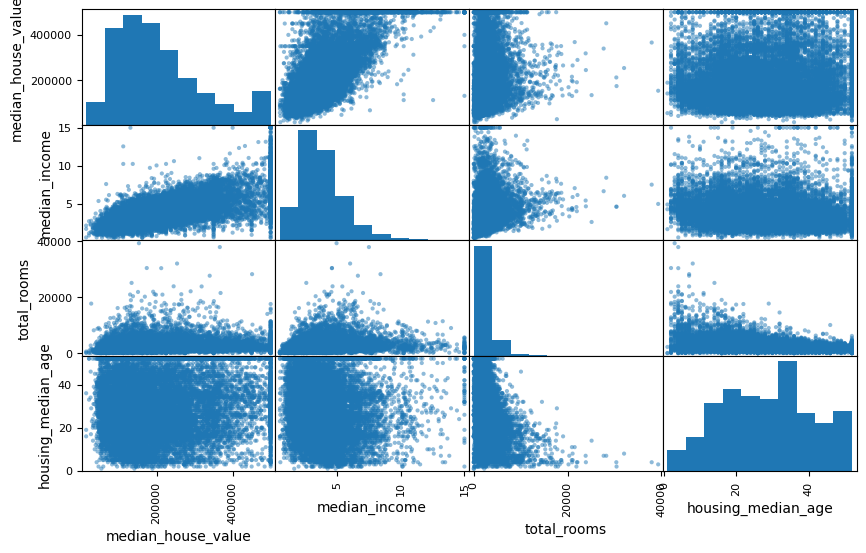

In [14]:
# Create attributes variable to check for correlation between them
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

from pandas.plotting import scatter_matrix
scatter_matrix(housing[attributes], figsize=(10, 6))

# Median income seems to be the most promising attribute to predict median house value

<Axes: xlabel='median_income', ylabel='median_house_value'>

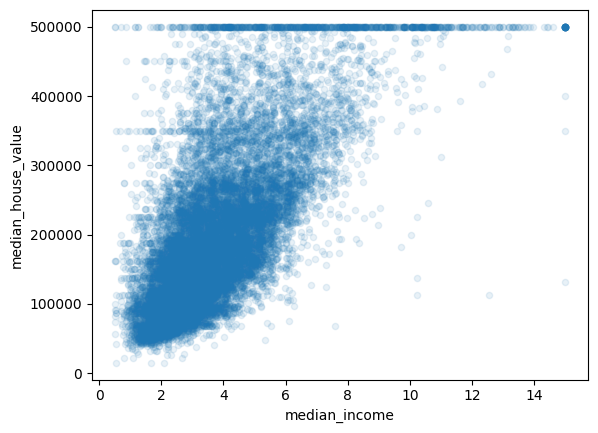

In [15]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

Observations:
- Uppward trend
- Capped at 500k (might be an issue)
- Horizontal line around 350k (darker) and 450k

## Attribute engineering

In [16]:
# Defining some attributes as combination of others
# Now we check the correlation of these new attributes with the median house value
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]
housing["bedrooms_per_household"] = housing["total_bedrooms"] / housing["households"]
housing["rooms_per_population"] = housing["total_rooms"] / housing["population"]
housing["bedrooms_per_population"] = housing["total_bedrooms"] / housing["population"]

In [17]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_population        0.199420
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
bedrooms_per_population     0.065432
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
bedrooms_per_household     -0.043349
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

Observations:
- Some of the new attributes have a significant (>0.1) possitive or negative correlation with the target

## Prepare data for training

In [18]:
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

### Missing values

In [19]:
# We need to deal with missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [20]:
housing_numerical = housing.select_dtypes(include=[np.number])
imputer.fit(housing_numerical)

SimpleImputer(strategy='median')

In [21]:
# Check imputer statistics and median values
print(f"Imputer: {imputer.statistics_}")
print(f"Median values: {housing_numerical.median().values}")

Imputer: [-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
Median values: [-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


In [22]:
# I want pandas DF instead of numpy array
from sklearn import set_config
set_config(transform_output="pandas")

In [23]:
# Fill missing values
housing_numerical = imputer.transform(housing_numerical)

# Quick check
housing_numerical.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

### Categorical attributes

In [24]:
housing_categorial = housing.select_dtypes(exclude=[np.number])
housing_categorial.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
Name: count, dtype: int64

In [25]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_categorial_encoded = ordinal_encoder.fit_transform(housing_categorial)
housing_categorial_encoded.head()

,ocean_proximity
12655,1.0
15502,4.0
2908,1.0
14053,4.0
20496,0.0


In [26]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Problem:
- Numerical proximity is considered as categorial proximity

Solution:
- One-hot encoding

In [27]:
set_config(transform_output="default") # Reset to default (sparse matrix), avoid error

from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
housing_categorial_1hot = one_hot_encoder.fit_transform(housing_categorial)
housing_categorial_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

### Feature scaling and transformation

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Output pandas DF for simplicity
set_config(transform_output="pandas")

min_max_scaler = MinMaxScaler()
housing_numerical_minmax = min_max_scaler.fit_transform(housing_numerical)

standard_scaler = StandardScaler()
housing_numerical_standard = standard_scaler.fit_transform(housing_numerical)

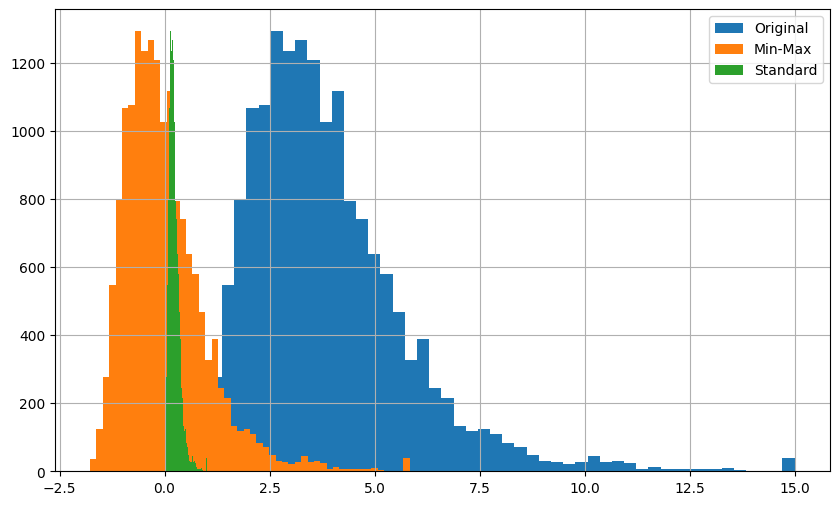

In [29]:
housing_numerical["median_income"].hist(bins=50, figsize=(10, 6))
housing_numerical_standard["median_income"].hist(bins=50, figsize=(10, 6))
housing_numerical_minmax["median_income"].hist(bins=50, figsize=(10, 6))
plt.legend(["Original", "Min-Max", "Standard"])

## Pipelines

Pipelines are used to apply transformers in sequence.

In [30]:
from sklearn.pipeline import Pipeline, make_pipeline

# Set config (useful for later)
set_config(display="diagram")

In [31]:
num_pipeline = Pipeline([
	("imputer", SimpleImputer(strategy="median")),
	("std_scaler", StandardScaler())
])
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

In [32]:
# Same thing but with make_pipeline
num_pipeline_2 = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
num_pipeline_2

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [33]:
housing_num_prep = num_pipeline.fit_transform(housing_numerical)

### Column transformer

In [34]:
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector

In [35]:
num_attribs = housing_numerical.columns
cat_attribs = housing_categorial.columns

# Redundant for clarity
num_pipeline = make_pipeline(
	SimpleImputer(strategy="median"),
	StandardScaler())

cat_pipeline = make_pipeline(
	SimpleImputer(strategy="most_frequent"),
	OneHotEncoder(handle_unknown="ignore"))

full_pipeline = ColumnTransformer([
	("num", num_pipeline, num_attribs),
	("cat", cat_pipeline, cat_attribs)
])

# Equivalent to the above
full_pipeline_2 = make_column_transformer(
	(num_pipeline, make_column_selector(dtype_include=np.number)),
	(cat_pipeline, make_column_selector(dtype_exclude=np.number))
)

In [36]:
# Set config error
set_config(transform_output="default")
housing_prepared = full_pipeline.fit_transform(housing)

In [37]:
housing_prepared = pd.DataFrame(
	housing_prepared, 
	columns=full_pipeline.get_feature_names_out(),
	index=housing.index)

In [38]:
housing_prepared.head()

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.0,1.0,0.0,0.0,0.0
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.0,0.0,0.0,0.0,1.0
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,0.0,1.0,0.0,0.0,0.0
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,0.0,0.0,0.0,0.0,1.0
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,1.0,0.0,0.0,0.0,0.0


## Final data preparation

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted, check_array
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None): # y needed for compatibility
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]


In [42]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.0, random_state=42)
similarities = cluster_simil.fit_transform(housing[['latitude', 'longitude']], sample_weight=housing_labels)

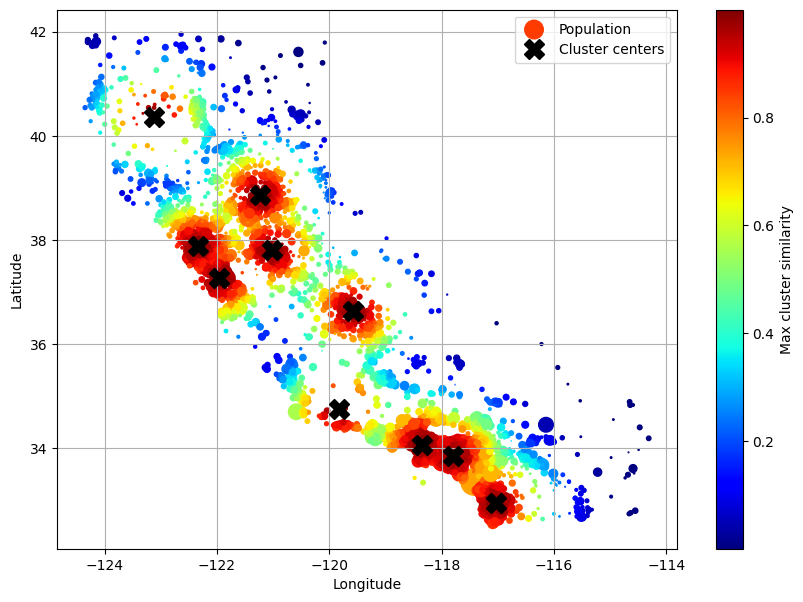

In [44]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (usd)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=15,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

Define the entire data pipeline.

In [52]:
from sklearn.preprocessing import FunctionTransformer

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
	return ["ratio"]

ratio_pipeline = make_pipeline(
	SimpleImputer(strategy="median"),
	FunctionTransformer(column_ratio, feature_names_out=ratio_name),
	StandardScaler()
)

log_pipeline = make_pipeline(
	SimpleImputer(strategy="median"),
	FunctionTransformer(np.log, feature_names_out="one-to-one"),
	StandardScaler()
)

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.0, random_state=42)

default_num_pipeline = make_pipeline(
	SimpleImputer(strategy="median"),
	StandardScaler()
)

preprocessing = ColumnTransformer([
	("bedrooms_per_room", ratio_pipeline, ["total_bedrooms", "total_rooms"]),
	("rooms_per_household", ratio_pipeline, ["total_rooms", "households"]),
	("population_per_household", ratio_pipeline, ["population", "households"]),
	("bedrooms_per_household", ratio_pipeline, ["total_bedrooms", "households"]),
	("rooms_per_population", ratio_pipeline, ["total_rooms", "population"]),
	("bedrooms_per_population", ratio_pipeline, ["total_bedrooms", "population"]),
	("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
	("geo", cluster_simil, ["latitude", "longitude"]),
	("cat", cat_pipeline, make_column_selector(dtype_include=object)),
], 
remainder=default_num_pipeline)

In [53]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 27)

In [54]:
preprocessing.get_feature_names_out()

array(['bedrooms_per_room__ratio', 'rooms_per_household__ratio',
       'population_per_household__ratio', 'bedrooms_per_household__ratio',
       'rooms_per_population__ratio', 'bedrooms_per_population__ratio',
       'log__total_bedrooms', 'log__total_rooms', 'log__population',
       'log__households', 'log__median_income',
       'geo__Cluster 0 similarity', 'geo__Cluster 1 similarity',
       'geo__Cluster 2 similarity', 'geo__Cluster 3 similarity',
       'geo__Cluster 4 similarity', 'geo__Cluster 5 similarity',
       'geo__Cluster 6 similarity', 'geo__Cluster 7 similarity',
       'geo__Cluster 8 similarity', 'geo__Cluster 9 similarity',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN', 'remainder__housing_median_age'],
      dtype=object)

# Select and train a model

## Training and evaluating on the training set

In [58]:
# Select a simple model, train it and evaluate it
# This is just to test, probably not a good model

from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms_per_room',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_na...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FCAB7F9D60>)])),
                ('linearregression', LinearRegression())])

In [66]:
housing_predictions = lin_reg.predict(housing)
print(housing_predictions[:5].round(-2))
print(housing_labels.iloc[:5].values)
error_ratio = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print("Error ratio: ")
print(f", ".join(f"{100 * error:.0f}%" for error in error_ratio))

[ 68900. 290000. 186600. 190400. 268700.]
[ 72100. 279600.  82700. 112500. 238300.]
Error ratio: 
-4%, 4%, 126%, 69%, 13%


In [67]:
from sklearn.metrics import root_mean_squared_error

lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse

67674.10670179442

In [68]:
# Trying another model
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms_per_room',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_na...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FCAB7F9D60>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [69]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = root_mean_squared_error(housing_labels, housing_predictions)
tree_rmse

0.0

The model is overfitting the training data.

Using cross-validation to evaluate the model.

## Cross-validation

In [70]:
from sklearn.model_selection import cross_val_score

# Divides the (training) set into 10 subsets, trains the model on 9 of those subsets and eval on the other one
# Repeats this 10 times, each time with a different eval set

tree_rmse = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [71]:
pd.Series(tree_rmse).describe()

count       10.000000
mean     67171.799735
std       2949.926284
min      63398.372942
25%      65135.178810
50%      66456.130922
75%      69055.463700
max      72993.343416
dtype: float64

In [72]:
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels, 
							scoring="neg_root_mean_squared_error", cv=10)

In [73]:
pd.Series(lin_rmses).describe()

count       10.000000
mean     68733.866170
std       2956.771220
min      64634.037863
25%      66351.274854
50%      69039.558008
75%      71074.169506
max      72954.224496
dtype: float64

In [74]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

In [75]:
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
								scoring="neg_root_mean_squared_error", cv=10)

In [76]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     46815.715823
std       2375.232096
min      43211.089304
25%      44971.075814
50%      46768.763362
75%      48230.076296
max      51288.585229
dtype: float64

In [77]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)

In [78]:
forest_rmse = root_mean_squared_error(housing_labels, housing_predictions)
forest_rmse

17337.388593790492

Validation errors are much higher than training errors.
Sign of Overfitting.

## Fine-tuning the model